# Exploratory Data Analysis

## Importing Libraries

In [28]:
import pandas as pd, numpy as np, seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

## Loading Data

The data we are using is from the following Kaggle competition: [Give Me Some Credit](https://www.kaggle.com/competitions/GiveMeSomeCredit/data). 

In [29]:
path = 'https://raw.githubusercontent.com/tanujmath/CreditGuard/main/data/cs-training.csv'
df = pd.read_csv(path)
df.shape

(150000, 12)

In [30]:
# rename the first unnamed column to ID
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
df.columns

Index(['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## Cleaning Data

Here we do the following:

    1. Delete rows with missing entries, and
    2. Delete rows where age is 0.

In [31]:
# print number of non-zero NA entries 
nullseries = df.isnull().sum()
print(nullseries[nullseries > 0]) 

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64


In [32]:
# drop NA
df.dropna(inplace=True)
print("After dropping NA, size of df =",df.shape)
# deleting age = 0 rows, everything else is allowed to be zero
df = df[df.age != 0]
print("After deleting rows with zero age, size of df =",df.shape)

After dropping NA, size of df = (120269, 12)
After deleting rows with zero age, size of df = (120268, 12)


## Data Visualization

We now plot all the features to look for outliers

Text(0.5, 1.0, 'Number Real Estate Loans Or Lines')

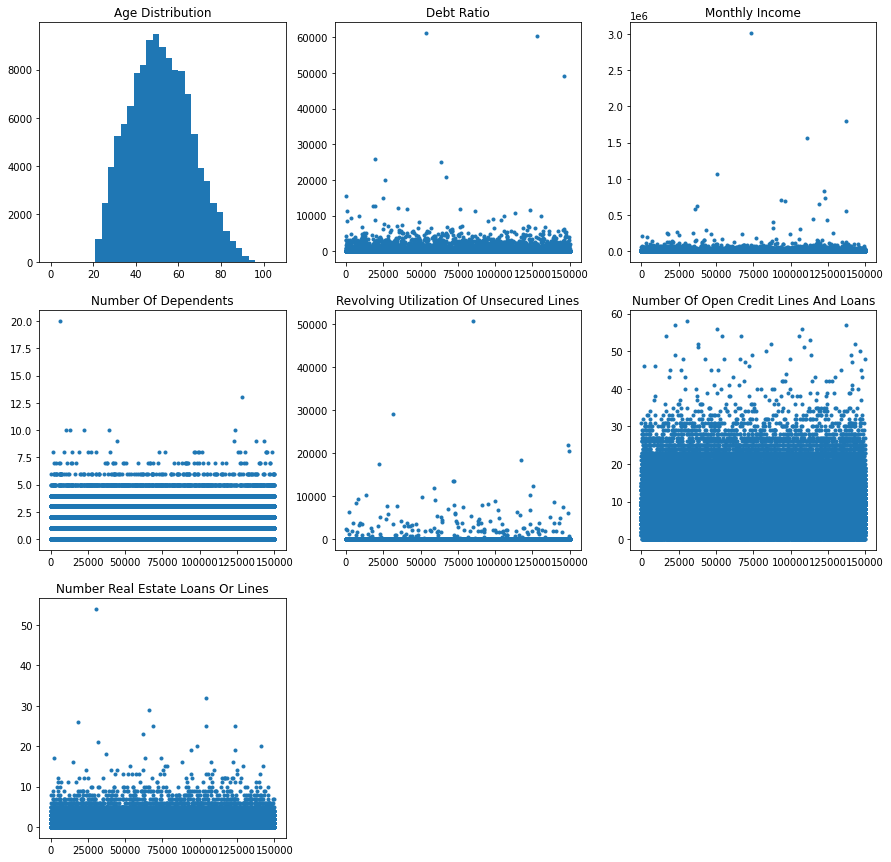

In [33]:
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)

ax.hist(df['age'], bins=[3*i for i in range(36)])
ax.set_title('Age Distribution')

ax2.scatter(df['ID'],df['DebtRatio'],marker='.')
ax2.set_title('Debt Ratio')

ax3.scatter(df['ID'],df['MonthlyIncome'],marker='.')
ax3.set_title('Monthly Income')

ax4.scatter(df['ID'],df['NumberOfDependents'],marker='.')
ax4.set_title('Number Of Dependents')

ax5.scatter(df['ID'],df['RevolvingUtilizationOfUnsecuredLines'],marker='.')
ax5.set_title('Revolving Utilization Of Unsecured Lines')

ax6.scatter(df['ID'],df['NumberOfOpenCreditLinesAndLoans'],marker='.')
ax6.set_title('Number Of Open Credit Lines And Loans')

ax7.scatter(df['ID'],df['NumberRealEstateLoansOrLines'],marker='.')
ax7.set_title('Number Real Estate Loans Or Lines')

Text(0.5, 1.0, 'Number Of Time 90 Days Past Due')

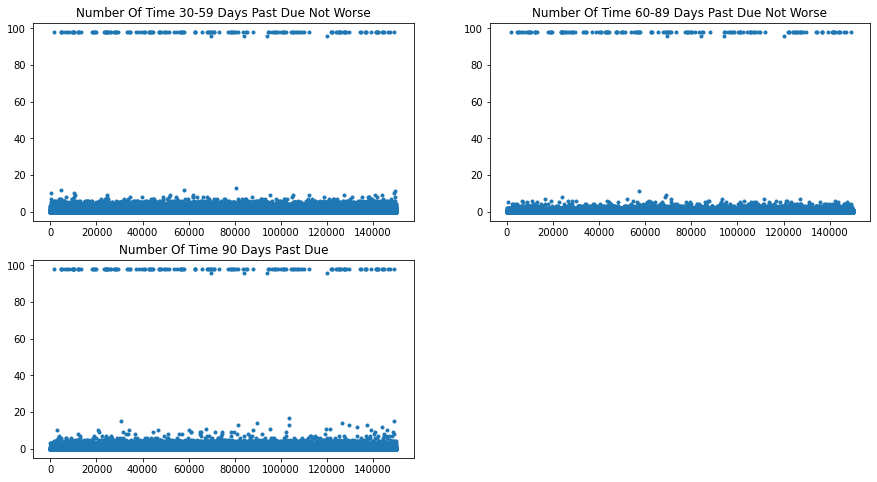

In [34]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)

ax.scatter(df['ID'],df['NumberOfTime30-59DaysPastDueNotWorse'],marker='.')
ax.set_title('Number Of Time 30-59 Days Past Due Not Worse')

ax2.scatter(df['ID'],df['NumberOfTime60-89DaysPastDueNotWorse'],marker='.')
ax2.set_title('Number Of Time 60-89 Days Past Due Not Worse')

ax3.scatter(df['ID'],df['NumberOfTimes90DaysLate'],marker='.')
ax3.set_title('Number Of Time 90 Days Past Due')

Now we plot the correlation matrix to find highly correlated features

<Axes: >

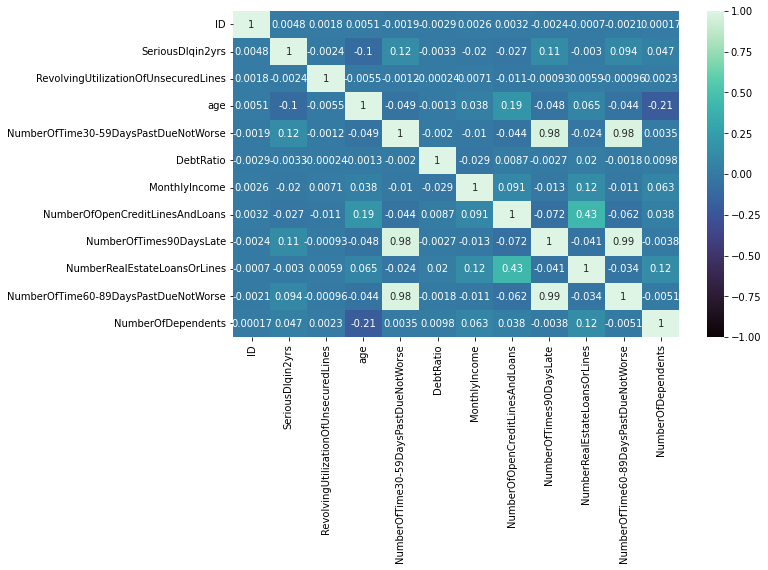

In [35]:
# Computing correlations
corr = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="mako")

<Axes: >

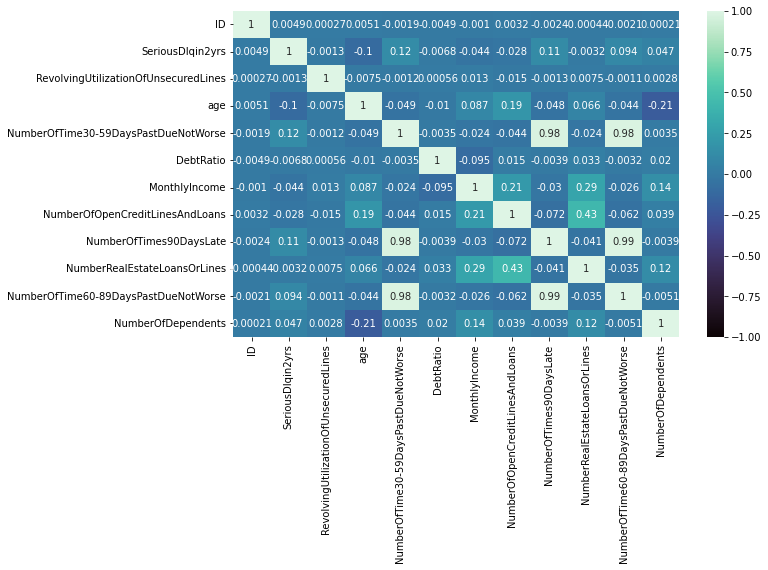

In [25]:
# Computing correlations
corr = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="mako")

## Data Engineering

We set the following threshold values for the features to remove the outliers:

    1. Debt Ratio <= 13,000
    2. Monthly Income <= 200,000
    3. Number of Dependents <= 10
    4. Revolving Utilization Of Unsecured Lines <= 12,500
    5. Number Real Estate Loans Or Lines <= 30

In [36]:
rows = df.shape[0] # No. of data points

df = df[df['DebtRatio']<=13000]
r_dr = rows - df.shape[0] # No. of Outliers removed using Debt Ratio

df = df[df['MonthlyIncome']<=200000]
r_mi = rows - r_dr - df.shape[0] # No. of Outliers removed using Monthly Income

df = df[df['NumberOfDependents']<=10]
r_nod = rows - r_dr - r_mi - df.shape[0] # No. of Outliers removed using Number of Dependents

df = df[df['RevolvingUtilizationOfUnsecuredLines']<=12500]
r_ruou = rows - r_dr - r_mi - r_nod - df.shape[0] # No. of Outliers removed using Revolving Utilization of Unsecured Lines

df = df[df['NumberRealEstateLoansOrLines']<=30]
r_nrelol = rows - r_dr - r_mi - r_nod - r_ruou - df.shape[0] # No. of Outliers removed using Number of Real Estate Loans Or Lines

print('Number of outliers removed in each step:')
print(f'Debt Ratio outliers = {r_dr}')
print(f'Monthly income outliers = {r_mi}')
print(f'No. of dependents outliers = {r_nod}')
print(f'Revolving Utilization outliers = {r_ruou}')
print(f'No. of Loans or Lines outliers = {r_nrelol}')

Number of outliers removed in each step:
Debt Ratio outliers = 9
Monthly income outliers = 29
No. of dependents outliers = 2
Revolving Utilization outliers = 8
No. of Loans or Lines outliers = 2


We plot these updated features again

Text(0.5, 1.0, 'Number Real Estate Loans Or Lines')

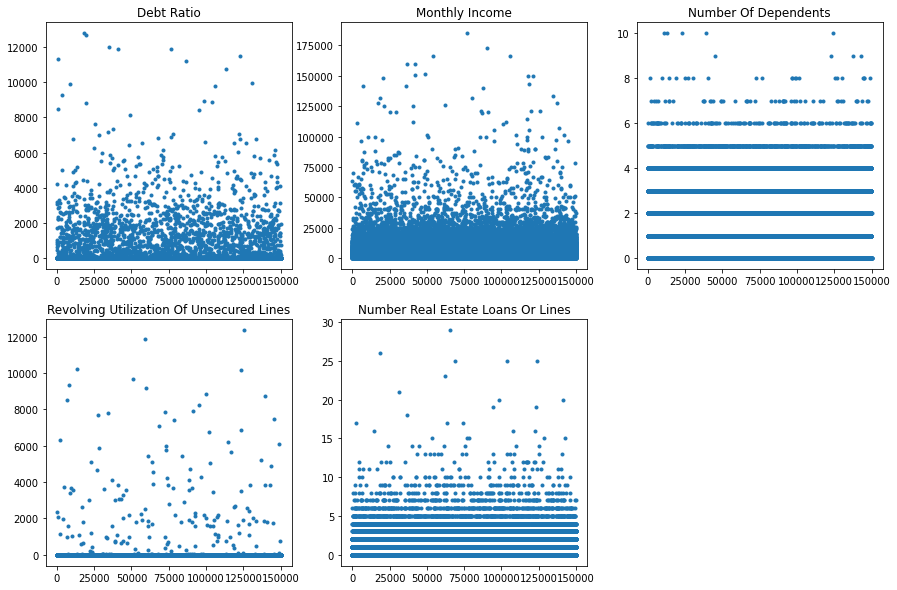

In [37]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 = f.add_subplot(233)
ax4 = f.add_subplot(234)
ax5 = f.add_subplot(235)


ax.scatter(df['ID'],df['DebtRatio'],marker='.')
ax.set_title('Debt Ratio')

ax2.scatter(df['ID'],df['MonthlyIncome'],marker='.')
ax2.set_title('Monthly Income')

ax3.scatter(df['ID'],df['NumberOfDependents'],marker='.')
ax3.set_title('Number Of Dependents')

ax4.scatter(df['ID'],df['RevolvingUtilizationOfUnsecuredLines'],marker='.')
ax4.set_title('Revolving Utilization Of Unsecured Lines')

ax5.scatter(df['ID'],df['NumberRealEstateLoansOrLines'],marker='.')
ax5.set_title('Number Real Estate Loans Or Lines')

In [44]:
df['RevolvingUtilizationOfUnsecuredLines'].head()

0    0.766127
1    0.957151
2    0.658180
3    0.233810
4    0.907239
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

From the correlation matrix, we see that features `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTime60-89DaysPastDueNotWorse`, and `NumberOfTimes90DaysLate` are highly correlated. So we drop the last two keeping only the `NumberOfTime30-59DaysPastDueNotWorse` feature in the dataframe.

<Axes: >

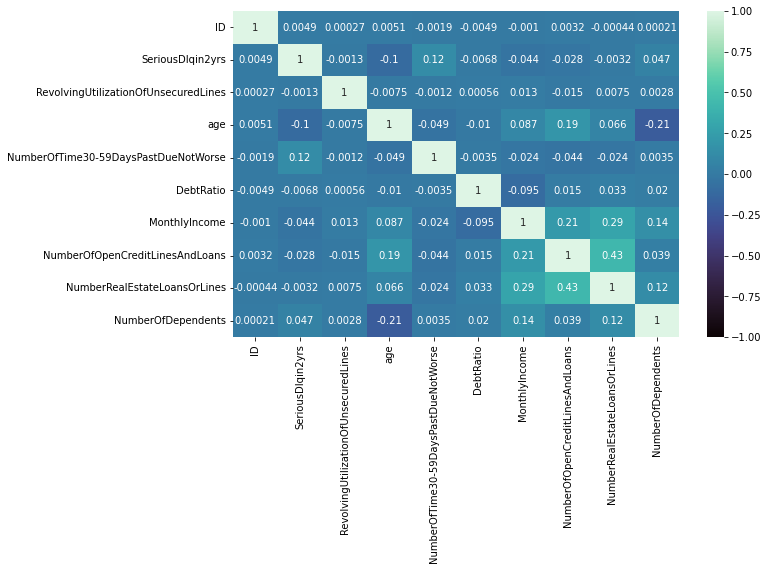

In [38]:
df = df.drop([ 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], axis = 1)

# Computing correlations again
corr = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="mako")

In [39]:
df.to_csv('./cs-training-new.csv',index=False)

In [9]:
df.shape

(115627, 12)

In [10]:
df=df[df['DebtRatio']<=1.5]
df=df[df['MonthlyIncome']<=200000]
df=df[df['NumberOfDependents']<=10]
df=df[df['RevolvingUtilizationOfUnsecuredLines']<=1.5]
df=df[df['NumberRealEstateLoansOrLines']<=30]
print('After data engineering, shape of df =',df.shape)

After data engineering, shape of df = (115627, 12)


In [22]:
df.shape

(120268, 10)